In [1]:
# Modelling data

In [1]:
# Loading
import pandas as pd
df=pd.read_csv("df_2.csv", sep=",")
df

,recordid,SAPS-I,Creatinine_last_log,SOFA,Age,BUN_last,Na_last,Weight,NIMAP_first,NIMAP_last,...,NISysABP_diff,NIDiasABP_diff,pH_diff,PaO2_diff,PaCO2_diff,In-hospital_death,CCU,CSRU,SICU,Gender
0,-1.508884,-1.342626,-0.356675,-1.264658,-0.604645,-0.854315,-0.669431,-6.327279e-16,0.778279,1.602599e-01,...,0.720286,4.397396e-01,-8.646334e-17,1.318287e-16,2.766267e-17,0,0,0,1,0.0
1,-1.508705,0.300668,0.262364,0.391428,0.654019,-0.218095,-0.902033,-2.374250e-01,-1.825970,-6.141845e-01,...,-1.574997,-8.330336e-01,1.361086e+00,1.089787e+00,-1.666857e+00,0,0,1,0,1.0
2,-1.508526,1.122315,-1.203973,1.101179,-1.176765,-1.099015,-0.204228,-1.096743e+00,1.260974,1.826724e+00,...,-0.427355,-1.663429e-01,8.626583e-01,-1.804519e+00,-1.718778e-01,0,0,0,0,0.0
3,-1.508168,-1.178297,-0.356675,-1.264658,0.196323,-0.756435,-0.436830,1.454837e-01,0.435488,1.521874e+00,...,-0.087313,-1.257291e+00,-8.646334e-17,1.318287e-16,2.766267e-17,0,0,0,0,1.0
4,-1.507810,0.464998,0.000000,-1.028074,1.340564,-0.022335,0.028374,-6.327279e-16,-0.251308,-2.853976e-01,...,0.295234,-2.269512e-01,-8.646334e-17,1.318287e-16,2.766267e-17,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5989,1.965126,0.793656,-0.510826,-0.081740,-0.719069,-0.805375,0.260976,-5.932794e-02,0.000000,1.000502e-15,...,0.000000,-2.691547e-17,-9.589378e-03,1.507234e+00,4.510303e-01,1,0,0,1,1.0
5990,1.865562,-0.192320,-0.356675,-1.028074,1.454988,-0.120215,-2.297644,-4.155221e-01,1.162255,8.410670e-01,...,0.720286,1.366983e-01,-8.646334e-17,1.318287e-16,2.766267e-17,0,1,0,0,0.0
5991,1.550394,-0.356650,1.029619,0.628011,0.425171,2.033144,1.191382,4.615720e+00,0.657152,4.658134e-01,...,-0.257334,5.609560e-01,-1.131051e+00,-1.201539e+00,2.818081e+00,0,1,0,0,0.0
5992,0.788082,0.629327,0.000000,1.101179,-0.719069,-0.022335,-1.134635,6.486079e-01,0.758293,-1.318225e+00,...,1.655402,1.651904e+00,-3.834098e-01,-7.284314e-01,-1.293112e+00,1,0,0,0,1.0


In [2]:
# Train test split

#TROVARE MODO DI PESARE IL TARGET

from sklearn.model_selection import train_test_split
y=df['In-hospital_death']
x= df.drop(['In-hospital_death'], axis=1)
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.30, stratify=y, random_state=123)

print(X_train.shape, X_test.shape)
type(y_train)

(4195, 29) (1799, 29)


pandas.core.series.Series

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import numpy as np

In [4]:
def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=5, scoring = 'f1', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)

    print("f1_test: ", f1_score(y_test, y_pred), "\n\n")
    print(confusion_matrix(y_test, y_pred), "\n\n")
    print(classification_report(y_test, y_pred), "\n\n")

    precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred)
    fig, ax = plt.subplots()
    ax.plot(recall, precision, color='purple')

    ax.set_title('Precision-Recall Curve')
    ax.set_ylabel('Precision')
    ax.set_xlabel('Recall')
    plt.show()

In [5]:
def roc(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_probs = model.predict_proba(X_test)

    fpr, tpr, thresholds1 = metrics.roc_curve(y_test, y_probs[:, 1])

    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('FP Rate')
    plt.ylabel('TP Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

    auc = metrics.roc_auc_score(y_test, y_probs[:, 1])
    print('AUC: %.2f' % auc)
    return (fpr, tpr)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(10,100, 1000)}

In [7]:
hyperp_search(classifier,parameters)

f1_train: 0.036315 using {'n_neighbors': 10}
f1_test:  0.06015037593984963 


[[1541    7]
 [ 243    8]] 


              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1548
           1       0.53      0.03      0.06       251

    accuracy                           0.86      1799
   macro avg       0.70      0.51      0.49      1799
weighted avg       0.82      0.86      0.80      1799
 




NameError: name 'plt' is not defined

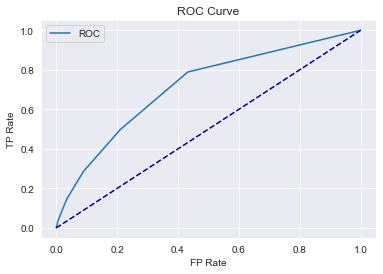

AUC: 0.71


In [57]:
model_knn = KNeighborsClassifier(n_neighbors=10)

fpr1, tpr1 = roc(model_knn, X_train, y_train, X_test, y_test)

In [9]:
#Tree

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 'max_depth': [4,5,10], 'min_samples_split': [20],'min_samples_leaf': [10], 'class_weight':['balanced']}

hyperp_search(classifier,parameters)

f1_train: 0.380388 using {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 20}
f1_test:  0.37872340425531914 


[[1037  511]
 [  73  178]] 


              precision    recall  f1-score   support

           0       0.93      0.67      0.78      1548
           1       0.26      0.71      0.38       251

    accuracy                           0.68      1799
   macro avg       0.60      0.69      0.58      1799
weighted avg       0.84      0.68      0.72      1799
 




NameError: name 'plt' is not defined

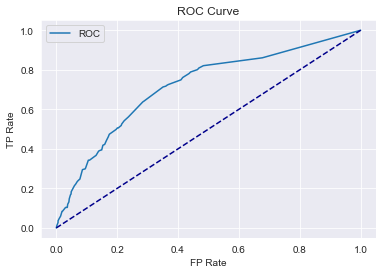

AUC: 0.72


In [10]:
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=10, min_samples_split=20)

fpr2,tpr2=roc(model_tree,X_train,y_train,X_test,y_test)

In [61]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB #or alternative NB implementations

model = GaussianNB()

model.fit(X_train, y_train)
y_pred=model.predict(X_test)

from sklearn.metrics import f1_score
print("f1_score: ", f1_score(y_test, y_pred))

print("f1_test: ", f1_score(y_test, y_pred))


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

f1_score:  0.34210526315789475
f1_test:  0.34210526315789475
[[1358  190]
 [ 160   91]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      1548
           1       0.32      0.36      0.34       251

    accuracy                           0.81      1799
   macro avg       0.61      0.62      0.61      1799
weighted avg       0.81      0.81      0.81      1799



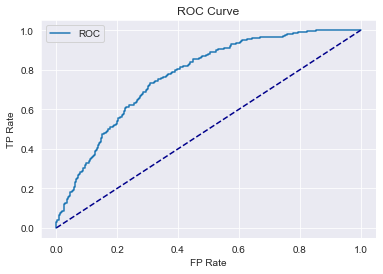

AUC: 0.77


In [62]:
y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case)

fpr3,tpr3=roc(model,X_train,y_train,X_test,y_test)

f1_train: 0.285438 using {'C': 10, 'max_iter': 1000}
f1_test:  0.20512820512820515 


[[1519   29]
 [ 219   32]] 


              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1548
           1       0.52      0.13      0.21       251

    accuracy                           0.86      1799
   macro avg       0.70      0.55      0.56      1799
weighted avg       0.83      0.86      0.82      1799
 




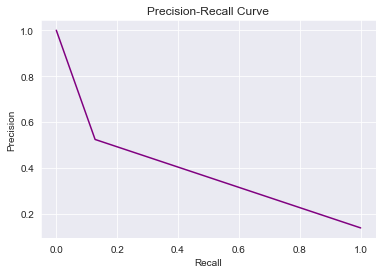

In [63]:
# Logistic

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
parameters = {"C":[1e-4,1e-3,1e-2,1e-1,1,10], "max_iter":[1000] }


hyperp_search(classifier,parameters)

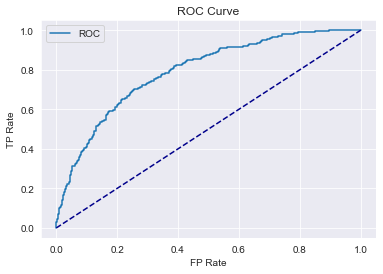

AUC: 0.79


In [64]:
model = LogisticRegression(C=1, max_iter=1000)

fpr4,tpr4=roc(model,X_train,y_train,X_test,y_test)

f1_train: 0.000000 using {'C': 0.1, 'kernel': 'linear'}
f1_test:  0.0 


[[1548    0]
 [ 251    0]] 


              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1548
           1       0.00      0.00      0.00       251

    accuracy                           0.86      1799
   macro avg       0.43      0.50      0.46      1799
weighted avg       0.74      0.86      0.80      1799
 




C:\Users\Alice Donati\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alice Donati\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alice Donati\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

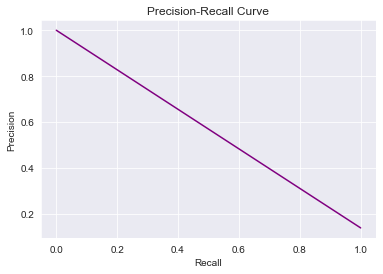

In [65]:
#SVM

from sklearn.svm import SVC

classifier = SVC()
parameters = {"kernel":['linear', 'rbf'], "C":[0.1]}

hyperp_search(classifier,parameters)

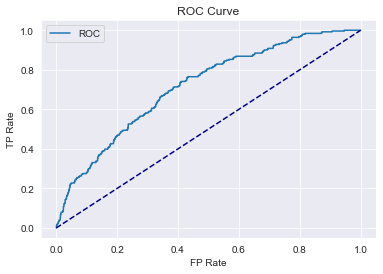

AUC: 0.72


In [66]:
model = SVC(C=0.1, kernel='linear',probability=True)

fpr5,tpr5=roc(model,X_train,y_train,X_test,y_test)

f1_train: 0.354445 using {'alpha': 0.001, 'hidden_layer_sizes': (20, 5), 'max_iter': 1000}
f1_test:  0.3167420814479638 


[[1427  121]
 [ 181   70]] 


              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1548
           1       0.37      0.28      0.32       251

    accuracy                           0.83      1799
   macro avg       0.63      0.60      0.61      1799
weighted avg       0.81      0.83      0.82      1799
 




C:\Users\Alice Donati\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


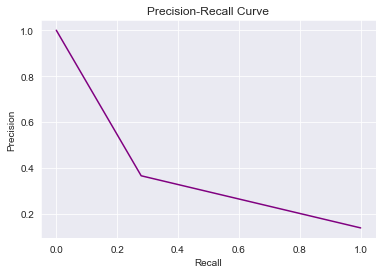

In [67]:
# Multi-layer Perceptron classifier

from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()
parameters = {"hidden_layer_sizes":[(10, 5),(20,5)],  "max_iter": [1000], "alpha": [0.001,0.1]}

hyperp_search(classifier,parameters)

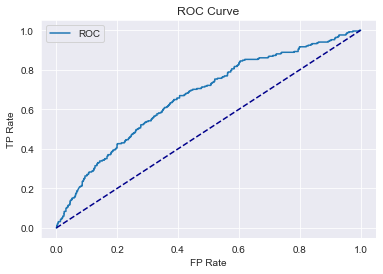

AUC: 0.67


In [68]:
model_MLP=MLPClassifier(hidden_layer_sizes=(20,5), alpha=0.001, max_iter=1000)

fpr6,tpr6=roc(model_MLP,X_train,y_train,X_test,y_test)

In [11]:
import numpy as np

from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10, random_state=123, class_weight='balanced')
parameters={'criterion': ['entropy','gini'], 'max_depth': [4,5,10], 'min_samples_leaf': [5, 10],'min_samples_split': [5, 10]}

def hyperp_search(classifier, parameters):
    gs=GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=0, n_jobs=-1)
    gs=gs.fit(X_train, y_train)
    print("f1_train: %f using %s" %(gs.best_score_, gs.best_params_))

    best_model=gs.best_estimator_
    y_pred=best_model.predict(X_test)

    print("f1_test: ", f1_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [12]:
hyperp_search(classifier,parameters)

f1_train: 0.423565 using {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 5}
f1_test:  0.4087968952134541
[[1184  364]
 [  93  158]]
              precision    recall  f1-score   support

           0       0.93      0.76      0.84      1548
           1       0.30      0.63      0.41       251

    accuracy                           0.75      1799
   macro avg       0.61      0.70      0.62      1799
weighted avg       0.84      0.75      0.78      1799



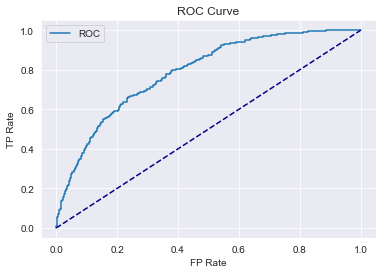

AUC: 0.79


In [14]:
model_RF=RandomForestClassifier(criterion='gini', max_depth=5, min_samples_leaf=10, min_samples_split=5)

fpr7,tpr7=roc(model_RF,X_train,y_train,X_test,y_test)

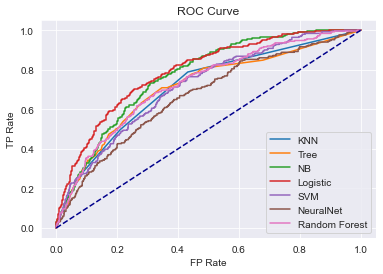

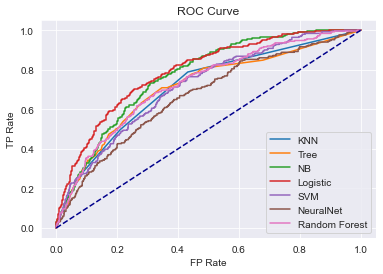

In [73]:
import matplotlib.pyplot as plt
plt.plot(fpr1, tpr1, label= "KNN")
plt.plot(fpr2, tpr2, label= "Tree")
plt.plot(fpr3, tpr3, label= "NB")
plt.plot(fpr4, tpr4, label= "Logistic")
plt.plot(fpr5, tpr5, label= "SVM")
plt.plot(fpr6, tpr6, label= "NeuralNet")
plt.plot(fpr7, tpr7, label= "Random Forest")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
# models vari

# SVM

# k-NN

# Tree / Random forest

# Ada boost (?) random forest con diversi modelli

# Neural network composta di pochi dense layer insieme


# all to use with class_weight parameter 

#DecisionTreeClassifier
#LogisticRegression
#RidgeClassifier
#The Keras Python Deep Learning 

In [ ]:
# Performances:
# minimum sensitivity and precision
# area under precision-recall curve
# area under reciving operating curve




In [ ]:
# Computing sensitivity and precision 
def metrics(): 
    results = []
    
    return results
    

In [ ]:
# ROC curve function 
# https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/


def ROC_curve(model, testX, testy)
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(testy))]
    lr_probs = model.predict_proba(testX)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(testy, ns_probs)
    lr_auc = roc_auc_score(testy, lr_probs)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Logistic: ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
    # plot the roc curve for the model
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()